In [44]:
%%writefile anglesutils.py

from numpy import array,sqrt,pi,sin
#0
def cvt(x):
   return x*pi/360

def recenter(x):
   r1 = -(x) + pi
   r1m = r1 % (2*pi)

   return -(r1m - pi)


Overwriting anglesutils.py


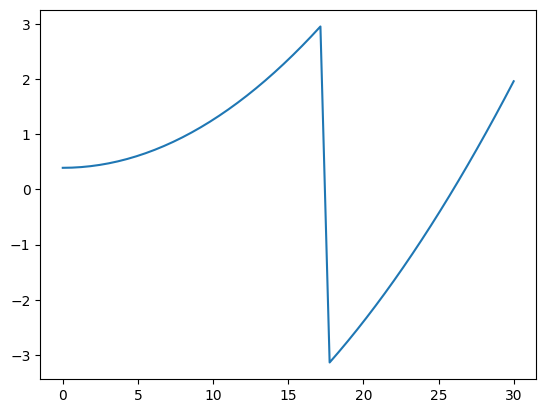

In [45]:
import numpy as np
import anglesutils as au
import matplotlib.pyplot as plt

def position(t):
  return 45 + t**2

t =np.linspace(0,30)
x =position(t)

plt.plot(t,au.recenter(au.cvt(x)))


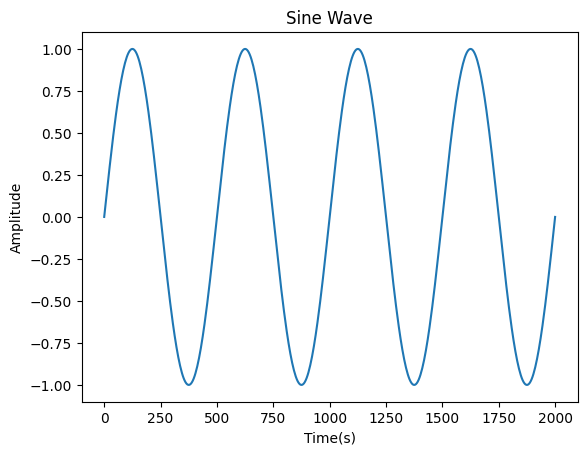

In [46]:
#1
def func1(time,amplitude,frequency,phase):

 return amplitude*np.sin(2*np.pi*frequency*time + phase)

time = np.linspace(0,2000,500)
plt.plot(time,func1(time,1,1,0))

plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave")
plt.show()

Orbital Period eqn

1.T = sqrt(4pi^2 * R^3/G*M)

2.T^2 = 4pi^2 * R^3/G*M

3.R = CBRT(GMT^2/4pi^2)

4.h = CBRT(GMT^2/4pi^2) - R

4.Since R in step 3 is the distance from the center of mass, h represents the alltiude above the surface and instead R is the radius of earth. If R is removed from the total distance from the centre of mass the alltiude h is found.


In [47]:
#2.2
def allitude(T,G,M,R):

  return (((G*M*T**2)/(4*np.pi**2))**(1/3))-R

#2.3
print("Desired oribtal period in s:")
T = input()
T = float(T)
print("Allitude required in meters", allitude(T,6.67e-11,5.972e+24,6371000),"m")

Desired oribtal period in s:
700000000000
Allitude required in meters 1703566277752.1113 m


In [48]:
#2.4
T = 24 * 60 * 60
print("Allitude required in meters", allitude(T,6.67e-11,5.972e+24,6371000),"m")
T = 90*60
print("Allitude required in meters", allitude(T,6.67e-11,5.972e+24,6371000),"m")
T= 45*60
print("Allitude required in meters", allitude(T,6.67e-11,5.972e+24,6371000),"m")
'''
Eventually graviational forces (ignoring friction) outpace the directional velocity taken for orbit
therefore concluded from T = 90 minutes, orbit shouldnt be taken from much lower
than 280 kms allitude
'''

Allitude required in meters 35860625.105889924 m
Allitude required in meters 280064.1802724404 m
Allitude required in meters -2181092.117536481 m


'\nEventually graviational forces outpace the directional velocity taken for orbit\ntherefore concluded from T = 90 minutes, orbit shouldnt be taken from much lower\nthan 280 kms allitude\n'

In [74]:
%%writefile linfit.py

#3.1
from pylab import *

def linfit(x,y):
 n = len(x)
 D = sum(x**2) - 1./n * sum(x)**2
 x_bar = mean(x)
 p_coeff, residuals, _, _, _ = polyfit(x, y, 1, full=True)
 m = p_coeff[0]
 c = p_coeff[1]

 #m = (max(y)-min(y))/(max(x)-min(x))
 dm = 1./(n-2)*residuals/D
 dm = sqrt(dm)
 #c = max(y) - m*max(x)
 dc = 1./(n-2)*(D/n + x_bar**2)*residuals/D
 dc = sqrt(dc)
 return  dm,  dc, m, c




Overwriting linfit.py


m:  0.1804913294797688
c:  0.054531791907514414
x:  [0.  0.1 0.2 0.4 0.5 0.6 0.8]
p:  [0.05453179 0.07258092 0.09063006 0.12672832 0.14477746 0.16282659
 0.19892486]


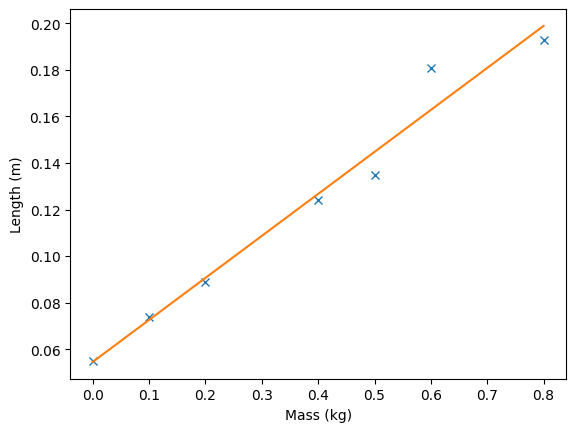

In [87]:
import linfit as er

x = np.array([0,0.1,0.2, 0.4, 0.5, 0.6, 0.8])
y = np.array([0.055, 0.074, 0.089, 0.124, 0.135, 0.181, 0.193])

m =er.linfit(x,y)[2]
c =er.linfit(x,y)[3]
print('m: ', m)
print('c: ', c)

#x = np.linspace(0, 2*np.pi, 7)
plt.plot(x, y, "x")


plt.xlabel("Mass (kg)")
plt.ylabel("Length (m)")
p = m*x + c
print('x: ', x)
print('p: ', p)
plot( x, p )

In [ ]:
#
#coeff = polyfit(x,y, 1 )
#p = poly1d(coeff )
#x=plt.np.linspace( min(x), max(x), 100 )